In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("./sample_data/concat.xlsx")
df1 = df.groupby(["연구수행주체", "기준년도"])["정부투자연구비"].count().reset_index()
df1.columns = ["연구수행주체", "기준년도", "과제건수"]
df1

,연구수행주체,기준년도,과제건수
0,국공립연구소,2018,1
1,기타,2004,1
2,기타,2008,1
3,기타,2009,1
4,기타,2010,2
...,...,...,...
87,출연연구소,2018,1
88,출연연구소,2019,1
89,출연연구소,2020,7
90,출연연구소,2021,5


In [4]:
df2 = df1.pivot("연구수행주체", "기준년도", "과제건수").fillna(0)
df2

/var/folders/_v/5dmkdghx2lgbnhn3s5ksp0080000gn/T/ipykernel_28501/3216023163.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df2 = df1.pivot("연구수행주체", "기준년도", "과제건수").fillna(0)


기준년도,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
연구수행주체,,,,,,,,,,,,,,,,,,,,,
국공립연구소,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
기타,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,...,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
대기업,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
대학,1.0,5.0,1.0,8.0,2.0,9.0,6.0,6.0,4.0,10.0,...,8.0,6.0,7.0,7.0,7.0,8.0,8.0,10.0,8.0,14.0
중견기업,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
중소기업,1.0,3.0,2.0,2.0,3.0,2.0,12.0,6.0,2.0,10.0,...,19.0,19.0,7.0,19.0,17.0,32.0,21.0,21.0,24.0,8.0
출연연구소,1.0,1.0,0.0,2.0,2.0,1.0,2.0,4.0,0.0,2.0,...,4.0,1.0,0.0,1.0,1.0,1.0,7.0,5.0,4.0,0.0


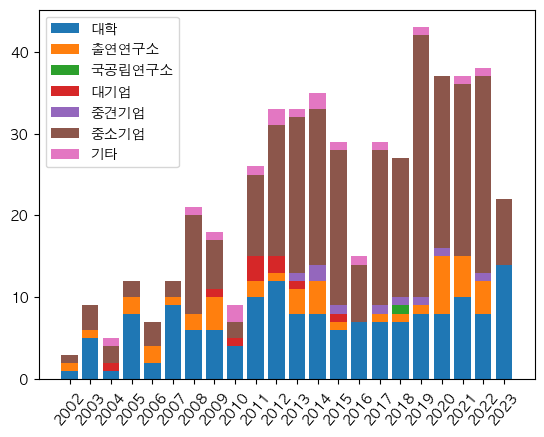

In [5]:
# matplotlib을 이용해 stacked bar chart를 만들기 위해서는 약간 복잡한 코딩작업이 필요

x = list(np.arange(2002, 2024))
lst_inst = ['대학', '출연연구소', '국공립연구소', '대기업', '중견기업', '중소기업', '기타']
plt.rcParams['font.family'] = "AppleGothic"
plt.bar(x, df2.loc[lst_inst[0],:], color = "C0", label=lst_inst[0])
b = 1
a = np.array(df2.loc[lst_inst[0]])
                     
for i in lst_inst[1:]:
    plt.bar(x, df2.loc[i, :], bottom = a, color = "C"+str(b), label=i)
    a += np.array(df2.loc[i, :])
    b += 1
plt.legend()
plt.xticks(np.arange(2002, 2024), rotation=50)
plt.show()

/var/folders/_v/5dmkdghx2lgbnhn3s5ksp0080000gn/T/ipykernel_17921/2140090931.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df3 = df1.pivot("기준년도", "연구수행주체", "과제건수").fillna(0)


<Axes: xlabel='기준년도'>

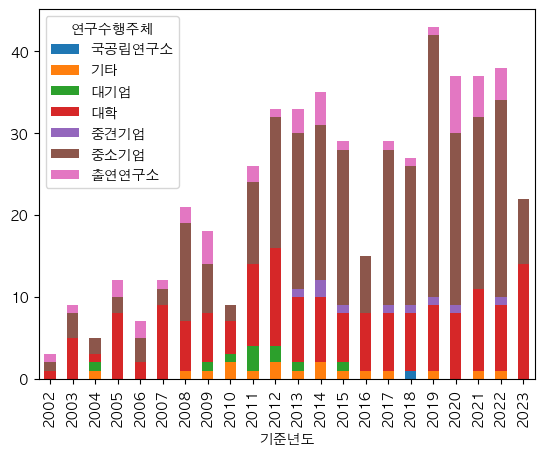

In [16]:
df3 = df1.pivot("기준년도", "연구수행주체", "과제건수").fillna(0)
df3.plot.bar(stacked=True)

In [20]:
df = pd.read_excel("./sample_data/concat.xlsx")
df1 = df.groupby("기술수명주기")["정부투자연구비"].count().reset_index()
df1.columns = ['기술수명주기', '과제건수']
df1

,기술수명주기,과제건수
0,기타,61
1,도입기,104
2,성숙기,30
3,성장기,244
4,쇠퇴기,1


In [22]:
df2 = df.groupby("기술수명주기")["정부투자연구비"].sum().reset_index()
df2.columns = ['기술수명주기', '연구비 합계']
df2['연구비 합계(억원)'] = df2['연구비 합계']/100000000
df2

,기술수명주기,연구비 합계,연구비 합계(억원)
0,기타,10103515000,101.035150
1,도입기,38981983000,389.819830
2,성숙기,5198000000,51.980000
3,성장기,79606620861,796.066209
4,쇠퇴기,20271194,0.202712


In [24]:
df_merge1 = pd.merge(df1, df2, on="기술수명주기")
df_merge1

,기술수명주기,과제건수,연구비 합계,연구비 합계(억원)
0,기타,61,10103515000,101.035150
1,도입기,104,38981983000,389.819830
2,성숙기,30,5198000000,51.980000
3,성장기,244,79606620861,796.066209
4,쇠퇴기,1,20271194,0.202712


In [27]:
df_merge1 = df_merge1.drop("연구비 합계", axis=1)

In [28]:
df_merge1

,기술수명주기,과제건수,연구비 합계(억원)
0,기타,61,101.035150
1,도입기,104,389.819830
2,성숙기,30,51.980000
3,성장기,244,796.066209
4,쇠퇴기,1,0.202712


In [30]:
df3 = df.groupby("연구개발단계")["정부투자연구비"].count().reset_index()
df3.columns = ['연구개발단계', '과제건수']
df3

,연구개발단계,과제건수
0,개발연구,336
1,기초연구,82
2,기타,43
3,응용연구,32


In [32]:
df4 = df.groupby("연구개발단계")["정부투자연구비"].sum().reset_index()
df4.columns = ["연구개발단계", "연구비 합계(억원)"]
df4['연구비 합계(억원)'] = df4['연구비 합계(억원)']/100000000
df4

,연구개발단계,연구비 합계(억원)
0,개발연구,835.349306
1,기초연구,132.182225
2,기타,397.062800
3,응용연구,134.785370


In [33]:
df_merge2 = pd.merge(df3, df4, on="연구개발단계")
df_merge2

,연구개발단계,과제건수,연구비 합계(억원)
0,개발연구,336,835.349306
1,기초연구,82,132.182225
2,기타,43,397.062800
3,응용연구,32,134.785370


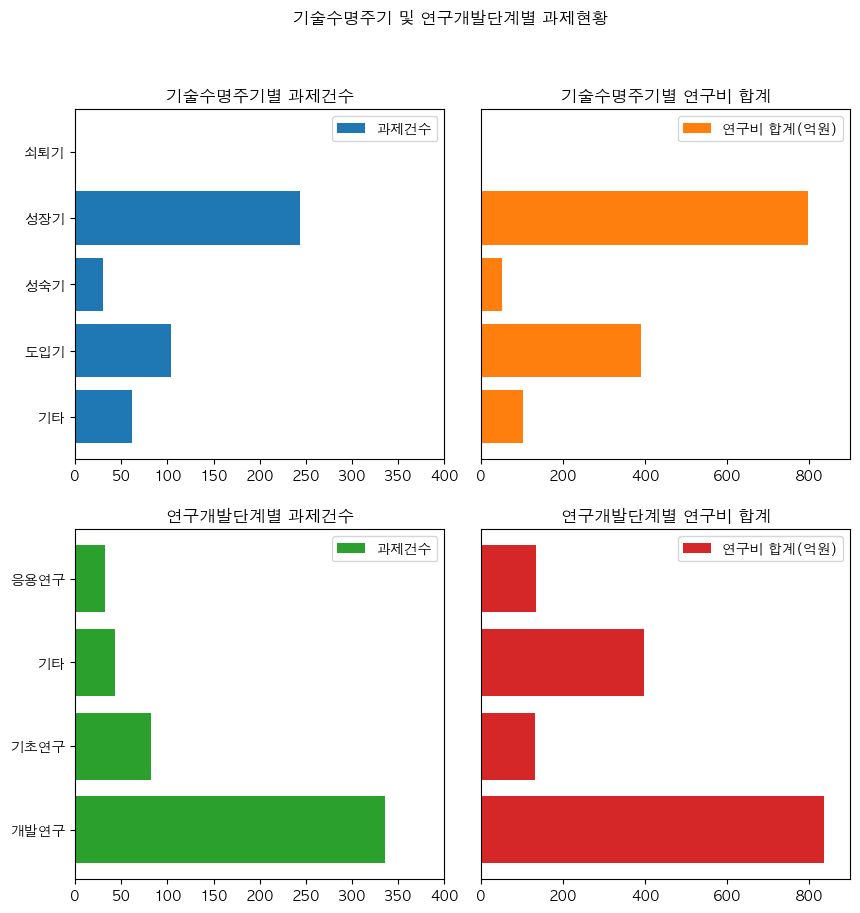

In [35]:
plt.figure(figsize=(10, 10))
plt.suptitle("기술수명주기 및 연구개발단계별 과제현황")
plt.subplot(2,2,1)
plt.barh(df_merge1['기술수명주기'], df_merge1['과제건수'], label='과제건수', color='C0')
plt.title("기술수명주기별 과제건수")
plt.xlim([0, 400])
plt.legend()
plt.subplot(2,2,2)
plt.barh(df_merge1['기술수명주기'], df_merge1['연구비 합계(억원)'], label='연구비 합계(억원)', color='C1')
plt.title("기술수명주기별 연구비 합계")
plt.legend()
plt.xlim([0, 900])
plt.yticks([])
plt.subplot(2,2,3)
plt.barh(df_merge2['연구개발단계'], df_merge2['과제건수'], label='과제건수', color='C2')
plt.title("연구개발단계별 과제건수")
plt.legend()
plt.xlim([0, 400])
plt.subplot(2,2,4)
plt.barh(df_merge2['연구개발단계'], df_merge2['연구비 합계(억원)'], label='연구비 합계(억원)', color='C3')
plt.title("연구개발단계별 연구비 합계")
plt.yticks([])
plt.legend()
plt.xlim([0, 900])
plt.subplots_adjust(wspace=.1, hspace=.2)
plt.show()

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_excel("./sample_data/concat.xlsx")
df1 = df[['기준년도', '부처명', '연구수행주체', '기술수명주기', '연구개발단계', '정부투자연구비']]
df1

,기준년도,부처명,연구수행주체,기술수명주기,연구개발단계,정부투자연구비
0,2015,산업통상자원부,중소기업,성숙기,기타,60000000
1,2020,교육부,대학,도입기,기초연구,100000000
2,2011,교육과학기술부,대학,성장기,응용연구,929000000
3,2011,환경부,대기업,성장기,개발연구,630000000
4,2014,산업통상자원부,기타,기타,기타,150000000
...,...,...,...,...,...,...
495,2019,환경부,기타,NaN,기타,96280000
496,2021,산업통상자원부,출연연구소,성장기,기타,9700000000
497,2022,산업통상자원부,출연연구소,성장기,기타,14550000000
498,2020,산업통상자원부,출연연구소,NaN,기타,300000000


In [3]:
df2 = df1['기준년도'].value_counts().reset_index()
df2.columns = ['기준년도', '과제건수']
df2.sort_values(by="기준년도", ascending=True, inplace=True)
df2

,기준년도,과제건수
21,2002,3
18,2003,9
20,2004,5
15,2005,12
19,2006,7
16,2007,12
12,2008,21
13,2009,18
17,2010,9
10,2011,26


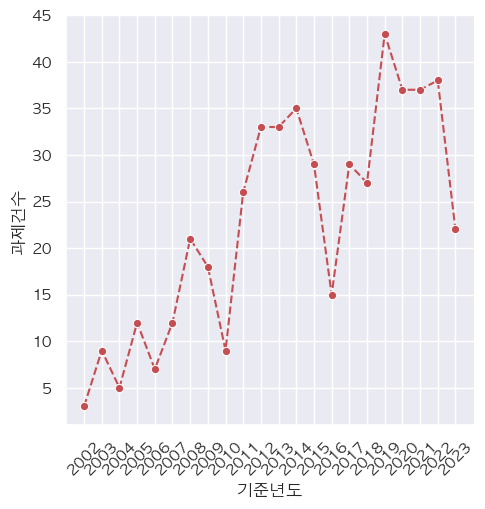

In [6]:
sns.set(font="AppleGothic")
sns.relplot(x = df2['기준년도'], y = df2['과제건수'], color='r', linestyle='--', marker='o', kind='line')
plt.xticks(np.arange(2002, 2024), rotation=45)
plt.show()

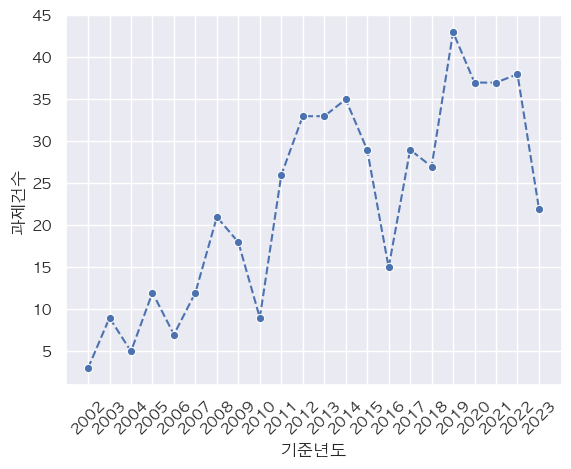

In [102]:
sns.set(font="AppleGothic")
sns.lineplot(x = "기준년도", y = "과제건수", data=df2, color='b', linestyle='--', marker='o')
plt.xticks(np.arange(2002, 2024), rotation=45)
plt.show()

In [9]:
df2 = df1.groupby(['기준년도', '연구수행주체'])["정부투자연구비"].count().reset_index()
df2.columns = ["기준년도", "연구수행주체", "과제건수"]
df2

,기준년도,연구수행주체,과제건수
0,2002,대학,1
1,2002,중소기업,1
2,2002,출연연구소,1
3,2003,대학,5
4,2003,중소기업,3
...,...,...,...
87,2022,중견기업,1
88,2022,중소기업,24
89,2022,출연연구소,4
90,2023,대학,14


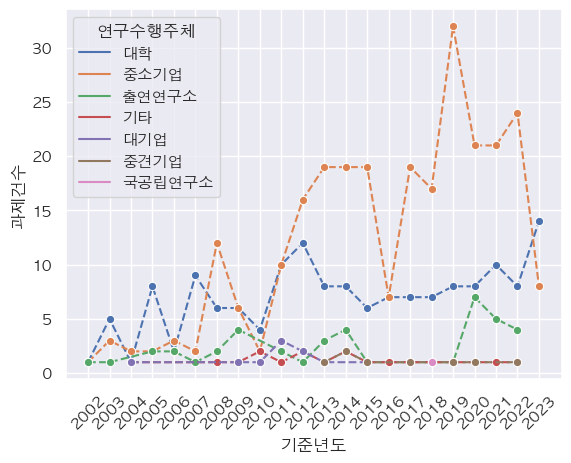

In [14]:
sns.set(font="AppleGothic")
sns.lineplot(x = "기준년도", y = "과제건수", data=df2, hue= "연구수행주체", color='r', linestyle='--', marker='o')
plt.xticks(np.arange(2002, 2024), rotation=45)
plt.show()

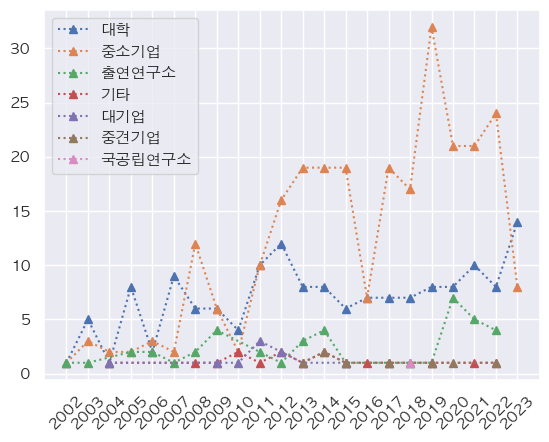

In [23]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = "AppleGothic"

lst_inst = list(df2['연구수행주체'].unique())

for i in lst_inst:
    df3 = df2[df2['연구수행주체']==i]
    plt.plot(df3['기준년도'], df3['과제건수'], label=i, linestyle=":", marker="^")
    
plt.legend()
plt.xticks(np.arange(2002, 2024), rotation=45)
plt.show()

In [103]:
df = pd.read_excel("./sample_data/concat.xlsx")
df1 = df[['기준년도', '부처명', '연구수행주체', '기술수명주기', '연구개발단계', '정부투자연구비']]
df2 = df1['기준년도'].value_counts().reset_index()
df2.columns = ['기준년도', '과제건수']
df2.sort_values(by="기준년도", ascending=True, inplace=True)
df2

,기준년도,과제건수
21,2002,3
18,2003,9
20,2004,5
15,2005,12
19,2006,7
16,2007,12
12,2008,21
13,2009,18
17,2010,9
10,2011,26


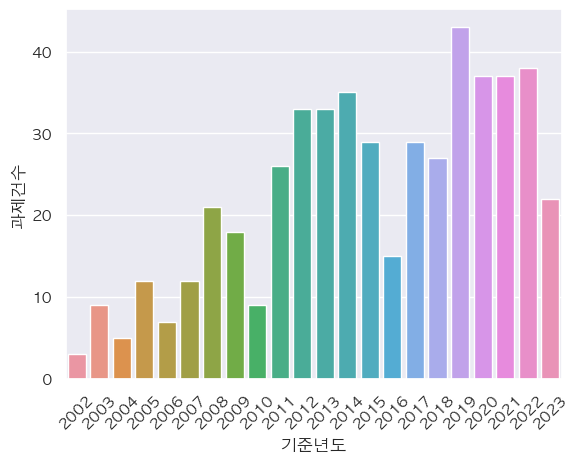

In [104]:
sns.set(font="AppleGothic")
sns.barplot(x="기준년도", y="과제건수", data=df2)
plt.xticks(rotation=45)
plt.show()

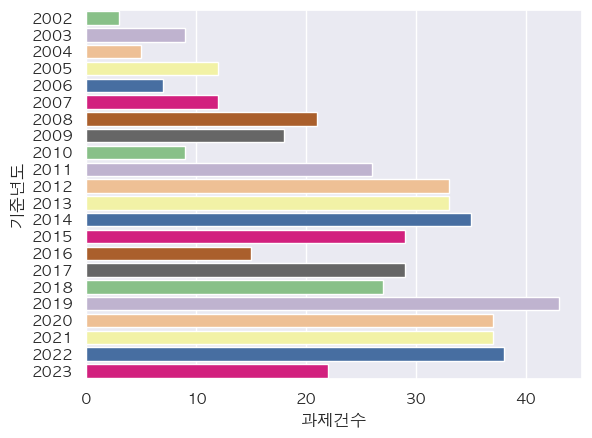

In [105]:
sns.set(font="AppleGothic")
sns.barplot(y="기준년도", x="과제건수", data=df2, orient='h', palette='Accent')
plt.show()

In [24]:
df = pd.read_excel("./sample_data/concat.xlsx")
df1 = df[['기준년도', '부처명', '연구수행주체', '기술수명주기', '연구개발단계', '정부투자연구비']]
df2 = df1['기준년도'].value_counts().reset_index()
df2.columns = ['기준년도', '과제건수']
df2.sort_values(by="기준년도", ascending=True, inplace=True)
df2 = df2.reset_index()
df2.drop("index", axis=1, inplace=True)
df2

,기준년도,과제건수
0,2002,3
1,2003,9
2,2004,5
3,2005,12
4,2006,7
5,2007,12
6,2008,21
7,2009,18
8,2010,9
9,2011,26


In [25]:
df3 = df1.groupby("기준년도")["정부투자연구비"].sum().reset_index()
df3

,기준년도,정부투자연구비
0,2002,244000000
1,2003,887000000
2,2004,770000000
3,2005,405000000
4,2006,857000000
5,2007,829000000
6,2008,2956000000
7,2009,2600000000
8,2010,1051000000
9,2011,6664980000


In [26]:
df_merge = pd.merge(df2, df3, on="기준년도")
df_merge

,기준년도,과제건수,정부투자연구비
0,2002,3,244000000
1,2003,9,887000000
2,2004,5,770000000
3,2005,12,405000000
4,2006,7,857000000
5,2007,12,829000000
6,2008,21,2956000000
7,2009,18,2600000000
8,2010,9,1051000000
9,2011,26,6664980000


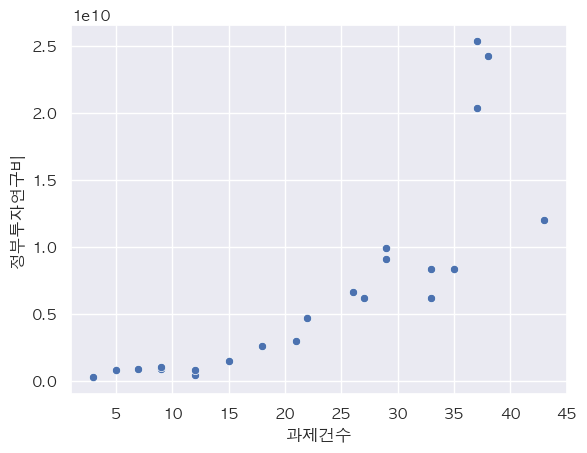

In [28]:
sns.scatterplot(x="과제건수", y="정부투자연구비", data=df_merge)
plt.show()

In [27]:
df_merge["구분"] = "전반기"
df_merge

,기준년도,과제건수,정부투자연구비,구분
0,2002,3,244000000,전반기
1,2003,9,887000000,전반기
2,2004,5,770000000,전반기
3,2005,12,405000000,전반기
4,2006,7,857000000,전반기
5,2007,12,829000000,전반기
6,2008,21,2956000000,전반기
7,2009,18,2600000000,전반기
8,2010,9,1051000000,전반기
9,2011,26,6664980000,전반기


In [28]:
for i, year in enumerate(df_merge['기준년도']):
    if year > 2013:
        df_merge.loc[i, '구분'] = '후반기'

df_merge

,기준년도,과제건수,정부투자연구비,구분
0,2002,3,244000000,전반기
1,2003,9,887000000,전반기
2,2004,5,770000000,전반기
3,2005,12,405000000,전반기
4,2006,7,857000000,전반기
5,2007,12,829000000,전반기
6,2008,21,2956000000,전반기
7,2009,18,2600000000,전반기
8,2010,9,1051000000,전반기
9,2011,26,6664980000,전반기


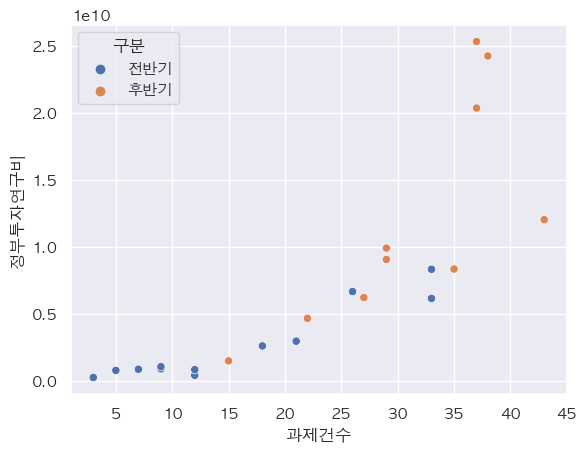

In [29]:
sns.scatterplot(x="과제건수", y="정부투자연구비", hue="구분", data=df_merge)
plt.show()

In [29]:
df = pd.read_excel("./sample_data/concat.xlsx")
df1 = df[['기준년도', '부처명', '연구수행주체', '기술수명주기', '연구개발단계', '정부투자연구비']]
df1

,기준년도,부처명,연구수행주체,기술수명주기,연구개발단계,정부투자연구비
0,2015,산업통상자원부,중소기업,성숙기,기타,60000000
1,2020,교육부,대학,도입기,기초연구,100000000
2,2011,교육과학기술부,대학,성장기,응용연구,929000000
3,2011,환경부,대기업,성장기,개발연구,630000000
4,2014,산업통상자원부,기타,기타,기타,150000000
...,...,...,...,...,...,...
495,2019,환경부,기타,NaN,기타,96280000
496,2021,산업통상자원부,출연연구소,성장기,기타,9700000000
497,2022,산업통상자원부,출연연구소,성장기,기타,14550000000
498,2020,산업통상자원부,출연연구소,NaN,기타,300000000


In [30]:
df2 = df1['기술수명주기'].value_counts().reset_index()
df2.columns = ["기술수명주기", "과제건수"]
df2

,기술수명주기,과제건수
0,성장기,244
1,도입기,104
2,기타,61
3,성숙기,30
4,쇠퇴기,1


In [31]:
df2['비중'] = df2['과제건수']/df2['과제건수'].sum()*100
df2

,기술수명주기,과제건수,비중
0,성장기,244,55.454545
1,도입기,104,23.636364
2,기타,61,13.863636
3,성숙기,30,6.818182
4,쇠퇴기,1,0.227273


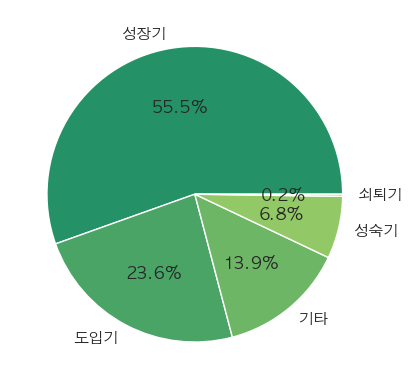

In [32]:
palette_color = sns.color_palette('summer')

plt.pie(df2['비중'], labels=df2['기술수명주기'], colors=palette_color, autopct='%.1f%%')
plt.show()

/var/folders/_v/5dmkdghx2lgbnhn3s5ksp0080000gn/T/ipykernel_55100/3547245723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['정부투자연구비(억원)'] = df1['정부투자연구비']/100000000


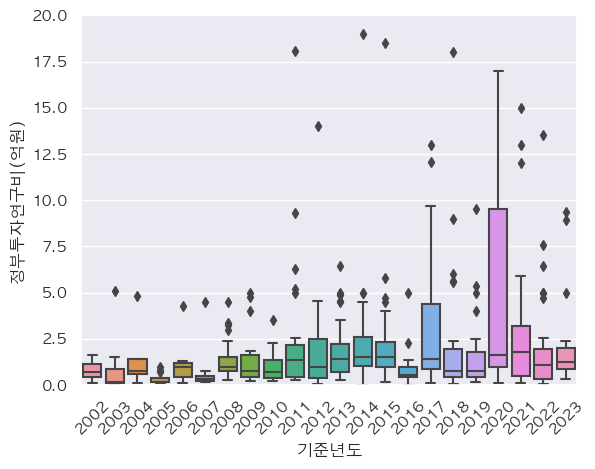

In [33]:
df1['정부투자연구비(억원)'] = df1['정부투자연구비']/100000000
sns.boxplot(data=df1, x="기준년도", y="정부투자연구비(억원)")
plt.xticks(rotation=45)
plt.ylim(0, 20)
plt.show()

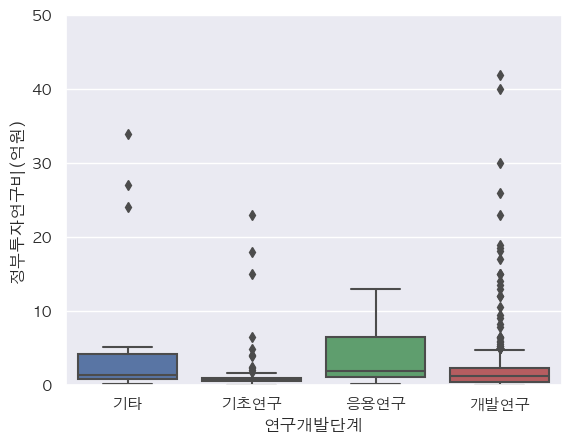

In [42]:
sns.boxplot(data=df1, x="연구개발단계", y="정부투자연구비(억원)")
plt.ylim(0, 50)
plt.show()

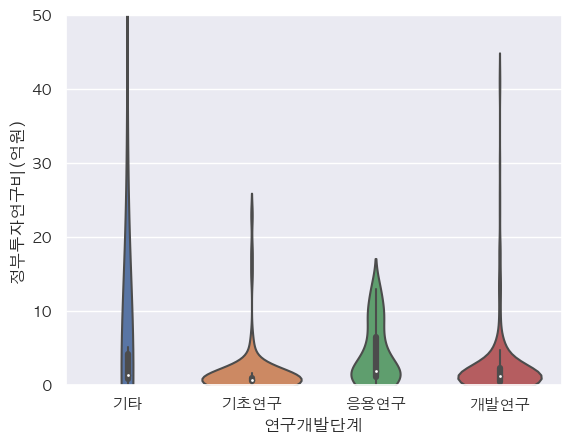

In [34]:
sns.violinplot(data=df1, x="연구개발단계", y="정부투자연구비(억원)")
plt.ylim(0, 50)
plt.show()

In [51]:
df = pd.read_excel("./sample_data/concat.xlsx")
df.columns

Index(['Unnamed: 0', 'NO', '기준년도', '사업명', '내역사업명', '부처명', '과제관리(전문)기관명',
       '과제고유번호', '(기관)세부과제번호', '계속과제여부구분', '이전과제고유번호', '총괄세부과제번호', '과제명(국문)',
       '과제명(영문)', '연구책임자명', '과제수행기관명', '사업자등록번호', '연구수행주체', '연구비 주집행지역',
       '총연구기간시작일', '총연구기간종료일', '다년도협약구분', '당해년도연구기간시작일', '당해년도연구기간종료일',
       '과학기술표준_연구분야분류1', '과학기술표준_연구분야분류가중치1', '과학기술표준_연구분야분류2',
       '과학기술표준_연구분야분류가중치2', '과학기술표준_연구분야분류3', '과학기술표준_연구분야분류가중치3',
       '과학기술표준_적용분야분류1', '과학기술표준_적용분야분류가중치1', '과학기술표준_적용분야분류2',
       '과학기술표준_적용분야분류가중치2', '과학기술표준_적용분야분류3', '과학기술표준_적용분야분류가중치3', '녹색기술분야분류',
       '6T관련기술분류', '국가전략기술', '기술수명주기', '세부과제성격', '세부과제_지원유형', '연구목표요약',
       '연구내용요약', '기대효과요약', '한글키워드', '영문키워드', '부처자체분류_대분류', '부처자체분류_중분류',
       '부처자체분류_소분류', '실용화대상여부구분', '연구개발단계', '연구개발성격구분', '과제진행상태구분', '과제협약일',
       '정부투자연구비', '인건비_현금', '인건비_현물', '직접비_현금', '직접비_현물', '간접비', '위탁연구비',
       '청관련물건비', '민간연구비_지방정부현금', '민간연구비_지방정부현물', '민간연구비_대학현금', '민간연구비_대학현물',
       '민간연구비_대기업현금', '민간연구비_대기업현물', '민간연구비_중견기업현금', '민간연

In [52]:
df1 = df[["기준년도", "연구비 주집행지역", "정부투자연구비"]]
df1["지역(광역)"] = df1['연구비 주집행지역'].map(lambda x : str(x).split(" ")[0])
df1

/var/folders/_v/5dmkdghx2lgbnhn3s5ksp0080000gn/T/ipykernel_55100/3495421491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["지역(광역)"] = df1['연구비 주집행지역'].map(lambda x : str(x).split(" ")[0])


,기준년도,연구비 주집행지역,정부투자연구비,지역(광역)
0,2015,서울특별시,60000000,서울특별시
1,2020,인천광역시 남구,100000000,인천광역시
2,2011,충청남도,929000000,충청남도
3,2011,경기도,630000000,경기도
4,2014,서울특별시,150000000,서울특별시
...,...,...,...,...
495,2019,서울특별시 강남구,96280000,서울특별시
496,2021,대전광역시 유성구,9700000000,대전광역시
497,2022,대전광역시 유성구,14550000000,대전광역시
498,2020,대전광역시 대덕구,300000000,대전광역시


In [53]:
df2 = df1.groupby(["지역(광역)", "기준년도"])["정부투자연구비"].count().reset_index()
df2.columns = ['지역', '기준년도', '과제건수']
df2

,지역,기준년도,과제건수
0,nan,2022,1
1,nan,2023,6
2,강원도,2003,1
3,강원도,2004,1
4,강원도,2008,1
...,...,...,...
213,충청북도,2015,2
214,충청북도,2018,4
215,충청북도,2019,2
216,충청북도,2021,2


In [54]:
df3 = df2.pivot("지역", "기준년도", "과제건수").fillna(0)
df3

/var/folders/_v/5dmkdghx2lgbnhn3s5ksp0080000gn/T/ipykernel_55100/2439320994.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df3 = df2.pivot("지역", "기준년도", "과제건수").fillna(0)


기준년도,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역,,,,,,,,,,,,,,,,,,,,,
nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
강원도,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0
경기도,0.0,1.0,0.0,1.0,2.0,0.0,4.0,3.0,1.0,5.0,...,5.0,6.0,0.0,5.0,6.0,7.0,11.0,7.0,8.0,2.0
경상남도,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,1.0,3.0,1.0,1.0,0.0,3.0,1.0,1.0
경상북도,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0
광주광역시,2.0,2.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,...,3.0,5.0,0.0,0.0,3.0,2.0,3.0,1.0,0.0,0.0
기타,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
대구광역시,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,...,1.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0,3.0,0.0
대전광역시,0.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,...,6.0,2.0,0.0,1.0,2.0,5.0,6.0,4.0,11.0,0.0


In [55]:
df3 = df3.drop("nan", axis=0)
df3

기준년도,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역,,,,,,,,,,,,,,,,,,,,,
강원도,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0
경기도,0.0,1.0,0.0,1.0,2.0,0.0,4.0,3.0,1.0,5.0,...,5.0,6.0,0.0,5.0,6.0,7.0,11.0,7.0,8.0,2.0
경상남도,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,1.0,3.0,1.0,1.0,0.0,3.0,1.0,1.0
경상북도,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0
광주광역시,2.0,2.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,...,3.0,5.0,0.0,0.0,3.0,2.0,3.0,1.0,0.0,0.0
기타,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
대구광역시,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,...,1.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0,3.0,0.0
대전광역시,0.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,...,6.0,2.0,0.0,1.0,2.0,5.0,6.0,4.0,11.0,0.0
부산광역시,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,2.0,1.0,2.0,3.0,1.0,2.0,0.0,1.0,1.0,2.0


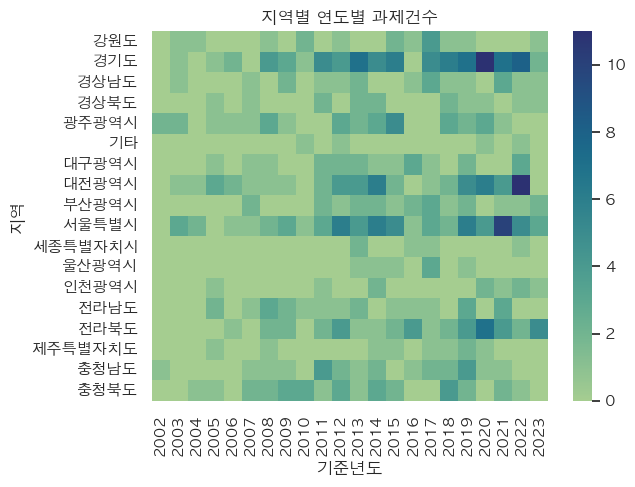

In [59]:
sns.heatmap(df3, cmap="crest")
plt.title("지역별 연도별 과제건수")
plt.show()

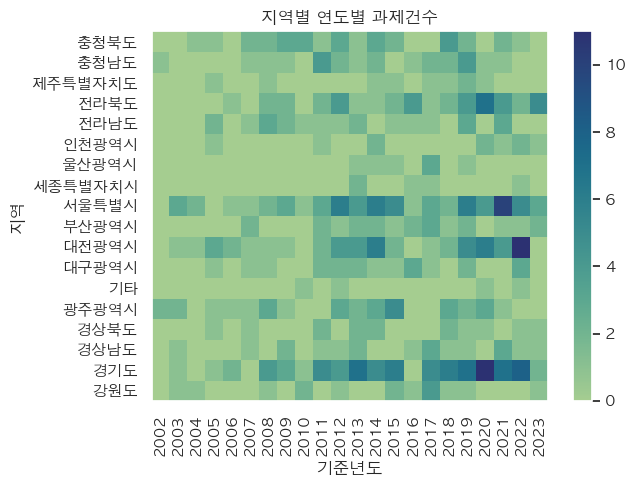

In [74]:
# matplotlib을 이용하여 구현
plt.pcolor(df3, cmap="crest")
plt.xticks(np.arange(0.5, len(df3.columns), 1), df3.columns, rotation=90)
plt.yticks(np.arange(0.5, len(df3.index), 1), df3.index)
plt.xlabel("기준년도")
plt.ylabel("지역")
plt.title("지역별 연도별 과제건수")
plt.colorbar()
plt.show()

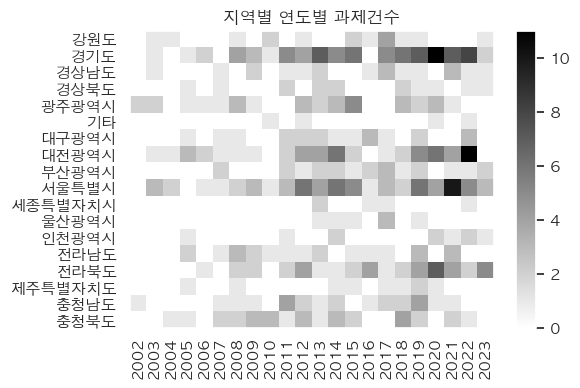

In [58]:
cmap = plt.get_cmap('binary')

plt.matshow(df3, cmap=cmap)

plt.xticks(np.arange(0, len(df3.columns)), df3.columns, rotation=90)
plt.yticks(np.arange(0, len(df3.index)), df3.index)

plt.colorbar(shrink=0.8, aspect=15)

plt.grid(False)

plt.tick_params(axis="x", top=False, bottom=False, labelbottom=True, labeltop=False, pad=0)
plt.title("지역별 연도별 과제건수")

plt.show()

In [35]:
df = pd.read_excel("./sample_data/concat.xlsx")
df1 = df[['기준년도', '부처명', '연구수행주체', '기술수명주기', '연구개발단계', '정부투자연구비']]
df1

,기준년도,부처명,연구수행주체,기술수명주기,연구개발단계,정부투자연구비
0,2015,산업통상자원부,중소기업,성숙기,기타,60000000
1,2020,교육부,대학,도입기,기초연구,100000000
2,2011,교육과학기술부,대학,성장기,응용연구,929000000
3,2011,환경부,대기업,성장기,개발연구,630000000
4,2014,산업통상자원부,기타,기타,기타,150000000
...,...,...,...,...,...,...
495,2019,환경부,기타,NaN,기타,96280000
496,2021,산업통상자원부,출연연구소,성장기,기타,9700000000
497,2022,산업통상자원부,출연연구소,성장기,기타,14550000000
498,2020,산업통상자원부,출연연구소,NaN,기타,300000000


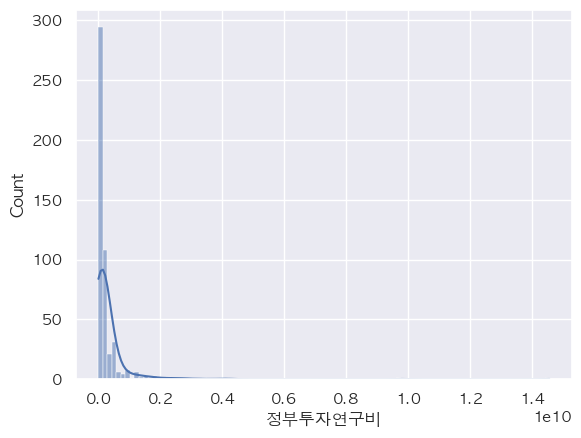

In [50]:
import seaborn as sns

sns.histplot(
    data = df["정부투자연구비"],
    bins = 100,
    kde = True
)

plt.show()